this project is about given the clinical parameters can we predict if someone has heart disease or not?

dataset is taken from https://www.kaggle.com/ronitf/heart-disease-uci

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [41]:
%matplotlib inline

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
from sklearn.model_selection import train_test_split,cross_val_score

In [46]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

In [47]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [49]:
from sklearn.metrics import plot_roc_curve

In [50]:
df=pd.read_csv("heart-disease.csv")

In [51]:
df.shape

(303, 14)

In [52]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [54]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

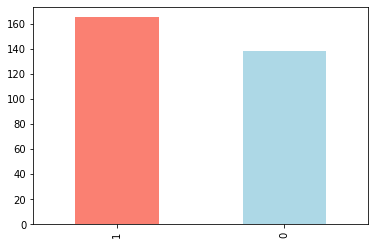

In [55]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [56]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [57]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [58]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [59]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

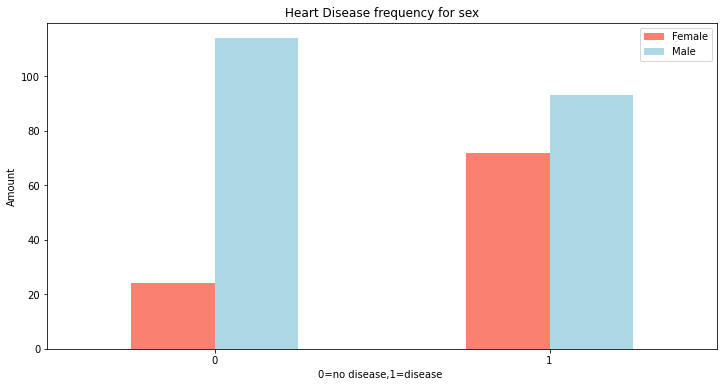

In [60]:
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["salmon","lightblue"],figsize=(12,6));
plt.title("Heart Disease frequency for sex")
plt.xlabel("0=no disease,1=disease ")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0)

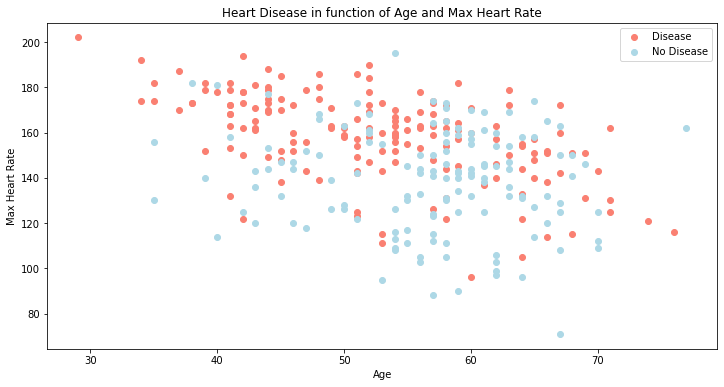

In [61]:
plt.figure(figsize=(12,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")



plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

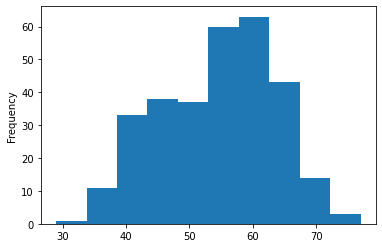

In [62]:
df.age.plot.hist();

In [63]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


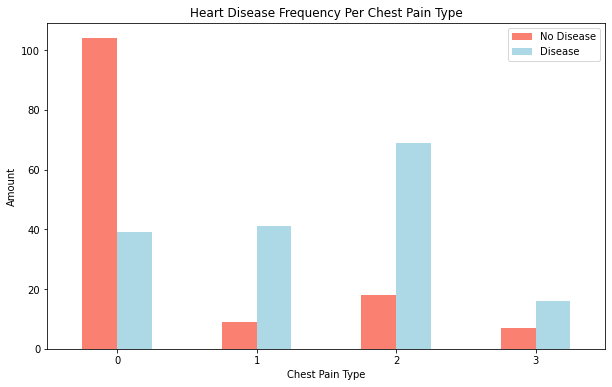

In [64]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [65]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

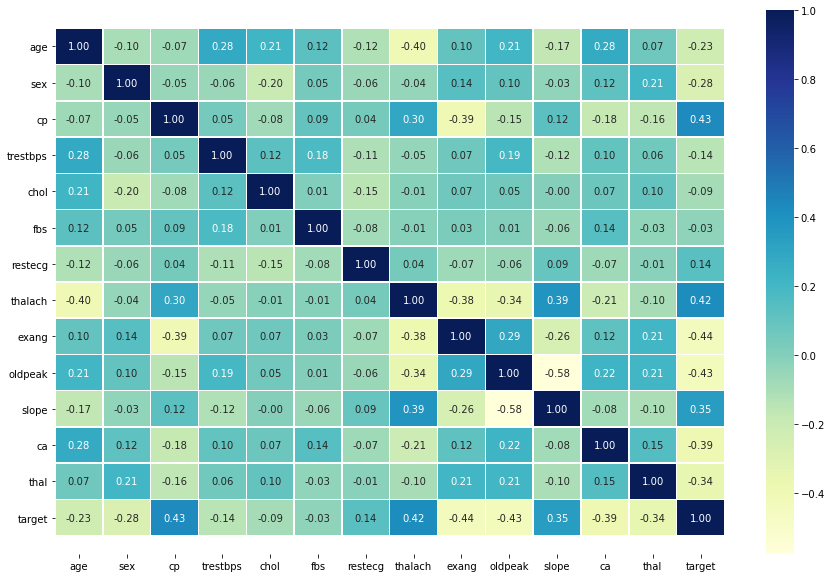

In [66]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,                 linewidths=0.5,
   fmt=".2f", annot=True,

                 
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [67]:
X = df.drop("target", axis=1)

y = df["target"]

In [68]:
np.random.seed(40)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [69]:
models={"Logistic Regression":LogisticRegression(),"Random Forest":RandomForestClassifier(),"KNN": KNeighborsClassifier()}

In [70]:
def fit(models,X_train,X_test,y_train,y_test):
    np.random.seed(40)
    modelscores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        modelscores[name]=model.score(X_test,y_test)
    return modelscores

In [71]:
modelscores=fit(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
modelscores


C:\Users\HP\realproject\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9016393442622951,
 'Random Forest': 0.8360655737704918,
 'KNN': 0.7049180327868853}

In [72]:
model_compare=pd.DataFrame(modelscores,index=["accuracy"])

In [73]:
model_compare

,Logistic Regression,Random Forest,KNN
accuracy,0.901639,0.836066,0.704918


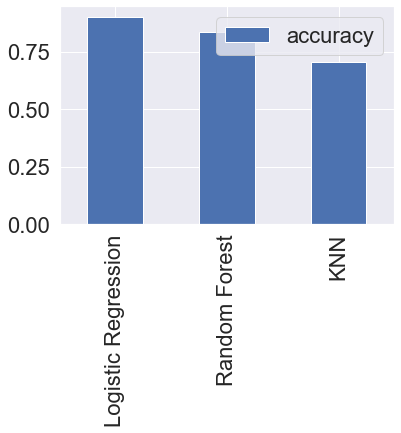

In [151]:

model_compare.T.plot.bar();



now we will try to increase the accuracy of the model by hyperparameter tuning

In [92]:
#first lets try to increase the efficiency of KNN
trainscores=[]
testscores=[]
neighbors=range(1,30)
knn=KNeighborsClassifier()
for i in neighbors:
    
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    trainscores.append(knn.score(X_train,y_train))
    testscores.append(knn.score(X_test,y_test))



In [93]:



best_efficiency_in_train_scores=max(trainscores)
best_efficiency_in_test_scores=max(testscores)    

In [94]:
best_efficiency_in_train_scores




1.0

In [79]:
best_efficiency_in_test_scores


0.7377049180327869

Maximum KNN score on the test data: 73.77%


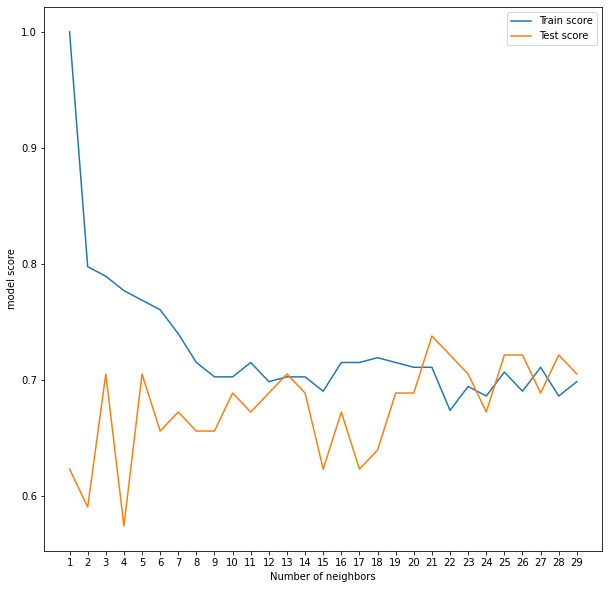

In [90]:

plt.figure(figsize=(10,10)) 
plt.plot(neighbors,trainscores,label="Train score")
   
plt.plot(neighbors,testscores,label="Test score")
plt.xticks(np.arange(1,30,1))
plt.xlabel("Number of neighbors")
plt.ylabel("model score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(testscores)*100:.2f}%")
           
        

from the graph its evident that n=21 is giving the highest efficiency

In [100]:
log_reg_grid = {"C": np.logspace(-4, 4, 25),
                "solver": ["liblinear"]}
rf_grid = {"n_estimators": np.arange(10, 1100, 50),
           "max_depth": [None, 3, 5, 11],
           "min_samples_split": np.arange(2, 26, 2),
           "min_samples_leaf": np.arange(1, 26, 2)}

In [105]:
np.random.seed(40)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=25,
                                verbose=True)
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.6s finished


In [106]:
rs_l_reg.best_params_

{'solver': 'liblinear', 'C': 0.1}

In [107]:
np.random.seed(40)
m=LogisticRegression(solver='liblinear',C=0.1).fit(X_train,y_train)
m.score(X_test,y_test)

0.9016393442622951

In [110]:
np.random.seed(40)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=25,
                           verbose=True)
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.8min finished


In [112]:
rs_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_depth': 11}

In [113]:
rs_rf.score(X_test, y_test)

0.8524590163934426

we can see hypertuning parameters lead to an increase in score of the random forest classifier

In [114]:
log_reg_grid = {"C": np.logspace(-4, 4, 25),
                "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.6s finished


In [115]:
gs_log_reg.best_params_

{'C': 0.1, 'solver': 'liblinear'}

In [116]:
gs_log_reg.score(X_test, y_test)

0.9016393442622951

In [117]:
y_pred=gs_log_reg.predict(X_test)

In [118]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [119]:
from sklearn.metrics import plot_roc_curve

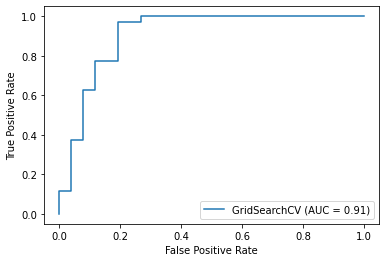

In [120]:
plot_roc_curve(gs_log_reg,X_test,y_test);

we can easily see that our model already has done great rather than by just guessing whcih is AUC score=.5
but perfect model has the score has 1 so there is still scope of improvement

In [121]:
print(confusion_matrix(y_test,y_pred))

[[21  5]
 [ 1 34]]


lets try to make the matrix more visual

(15.0, -1.0)

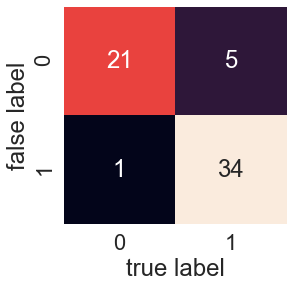

In [126]:
import seaborn as sns
sns.set(font_scale=2)
def plot_confusion_matrix(y_test,y_pred):
    fig,ax=plt.subplots(figsize=(4,4))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,
                  cbar=False)
    plt.xlabel("true label")
    plt.ylabel("false label")
plot_confusion_matrix(y_test,y_pred)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)    

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.87      0.97      0.92        35

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61



In [128]:
gs_log_reg.best_params_


{'C': 0.1, 'solver': 'liblinear'}

In [129]:
from sklearn.model_selection import cross_val_score

In [131]:
m=LogisticRegression(
    C=0.1,solver="liblinear")

In [132]:
cvs=cross_val_score(m,X,y,cv=5,scoring="accuracy")
cvs

array([0.81967213, 0.90163934, 0.83606557, 0.86666667, 0.75      ])

In [133]:
cvs=np.mean(cvs)
cvs

0.834808743169399

In [135]:
cv_precision = np.mean(cross_val_score(m,
                                       X,
                                       y,
                                       cv=5, 
                                       scoring="precision"))
cv_precision

0.8182683982683983

In [136]:
cv_recall = np.mean(cross_val_score(m,
                                    X,
                                    y,
                                    cv=5, 
                                    scoring="recall")) 
cv_recall

0.9030303030303031

In [139]:
cv_f1 = np.mean(cross_val_score(m,
                                X,
                                y,
                                cv=5, scoring="f1"))                
cv_f1

0.8572876223964057

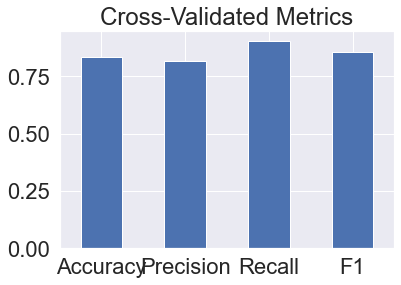

In [144]:
cv_metrics = pd.DataFrame({"Accuracy": cvs,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
plot=cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);
plt.xticks(rotation=0);


In [153]:
m.fit(X_train,y_train);

In [154]:
m.coef_

array([[ 0.00528131, -0.5773    ,  0.65751581, -0.02122326, -0.00159648,
        -0.064795  ,  0.26019854,  0.02885424, -0.32666742, -0.39535361,
         0.22280057, -0.53904199, -0.49342343]])

In [156]:
features_dict = dict(zip(df.columns, list(m.coef_[0])))
features_dict

{'age': 0.005281307571704832,
 'sex': -0.5773000046154384,
 'cp': 0.65751581404055,
 'trestbps': -0.021223256297907826,
 'chol': -0.0015964803082557425,
 'fbs': -0.06479499678420858,
 'restecg': 0.2601985423600449,
 'thalach': 0.02885424381172165,
 'exang': -0.3266674162942659,
 'oldpeak': -0.3953536056007379,
 'slope': 0.22280056648354993,
 'ca': -0.5390419863813516,
 'thal': -0.49342342604716105}

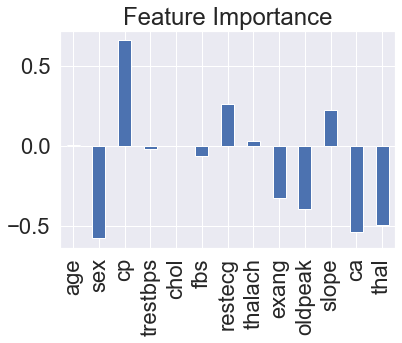

In [157]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);